# Bunker-C

### Compares output from Bunker-C parameterizations based on the OSCAR model and two  Environment Canada website Bunker-C types

1. Bunker-C: http://www.etc-cte.ec.gc.ca/databases/OilProperties/pdf/WEB_Bunker_C_Fuel_Oil.pdf
2. Bunker-C Anchorage: http://www.etc-cte.ec.gc.ca/databases/OilProperties/pdf/WEB_Bunker_C_Fuel_Oil_(Alaska).pdf

**OSCAR values**:
```
ASPHALTENECONTENT :     11
WAXCONTENT :             2
RESINCONTENT :          20
SATURATECONTENT :       23
```
**Environment Canada Bunker-C values**:
```
ASPHALTENECONTENT :     06
WAXCONTENT :            12
RESINCONTENT :          15
SATURATECONTENT :       24
```
Both the examples above use Fingas evaporation with SquareRoot and the following constants
```
FINGAS_EVAP_CONST1       : 0.35
FINGAS_EVAP_CONST2       : 0.13
```
They also both use:
```
VISCREF                   : 45030.0
API                       : 14.1
POURPOINT                 : 15.0
```

**Environment Canada Bunker-C Anchorage values (different from above)**: 
```
RESINCONTENT              : 17
SATURATECONTENT           : 25

FINGAS_EVAP_CONST1        : -0.13
FINGAS_EVAP_CONST2        : 0.013

VISCREF                   : 8706.0
API                       : 11.4
POURPOINT                 : -2.0 
```

In [13]:
import xarray as xr
import numpy as np
import numpy.ma as ma
from salishsea_tools import viz_tools, utilities
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
%matplotlib inline
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [14]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [15]:
#### Load results from OSCAR parameters

with open('/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_OSCAR/resOilOutput.sro', 'r') as the_file:
    all_data = [line.strip() for line in the_file.readlines()]
    header = all_data[4]  
    
# Order header into list array by splitting up string
header_arr = []
header_arr = header.split(' ')
# Remove emtpy entries from list
header_arr = np.asarray([x for x in header_arr if x != ''])
header_arr

array(['Seconds', 'YY', 'MM', 'DD', 'hh', 'mm', 'ss', 'MassOil',
       'VolOilBeached', 'VolumeBeached', 'VolumeOil', 'Volume', 'Area',
       'TeoricalArea', 'Thickness', 'MEvaporated', 'VEvaporated',
       'FMEvaporated', 'MDispersed', 'VDispersed', 'FMDispersed',
       'MSedimented', 'VSedimented', 'FMSedimented', 'MDissolved',
       'VDissolved', 'FMDissolved', 'MChemDisp', 'VChemDisp', 'FMChemDisp',
       'MOilRecovered', 'VOilRecovered', 'FMOilRecovered', 'MWaterContent',
       'VWaterContent', 'Density', 'Viscosity', 'MBio', 'VBio', 'FMBio',
       'CharacteristicDiameter', 'P_Star', 'AnalyteMass1', 'AnalyteMass2',
       'AnalyteMass3', 'AnalyteMass4', 'AnalyteMass5', 'AnalyteBio1',
       'AnalyteBio2', 'AnalyteBio3', 'AnalyteBio4', 'AnalyteBio5'],
      dtype='<U22')

In [16]:
#### Load output using OSCAR parameterizations 

oscar_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_OSCAR/resOilOutput.sro'
file_in = oscar_in
data_oscar2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000
nrows,ncols = data_oscar2D.shape

In [28]:
#### Load output using EC website parameterizations

ec_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17/resOilOutput.sro'
file_in = ec_in
data_ec2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000
#nrows,ncols = data_fingas2D.shape
ecAK_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_SmallerEvapCoef/resOilOutput.sro'
file_in = ecAK_in
data_ecAK2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000

# These are from the fixed run
ecAKfix_in = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_EvapFix/resOilOutput.sro'
file_in = ecAKfix_in
data_ecAKfix2D = np.genfromtxt(file_in, skip_header=6, skip_footer=4)/1000

In [29]:
#### Create structured Array

# define structure of structured array
# This doesn't appear to be correct, but I haven't yet figured out what I've done wrong with the datatype
dtype = [('Header',(np.str_,22)),('Values', np.float64)]

# create index list for for-loop over columns
header_range = range(header_arr.size)
data_range = range(nrows)

# Assign 2D data and header strings to structured array
massbalance_oscar = np.array([[(header_arr[hdr_index], data_oscar2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)
massbalance_ec = np.array([[(header_arr[hdr_index], data_ec2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)
massbalance_AKec = np.array([[(header_arr[hdr_index], data_ecAK2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)
massbalance_AKfixec = np.array([[(header_arr[hdr_index], data_ecAKfix2D[data_index, hdr_index]) for hdr_index in header_range] for data_index in data_range], dtype=dtype)

#### Plot results

In [30]:
plot_data = [15,18,24,37]
header_arr[plot_data]

array(['MEvaporated', 'MDispersed', 'MDissolved', 'MBio'],
      dtype='<U22')

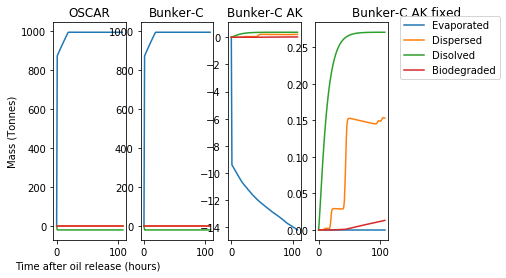

In [40]:
plot_data = [15,18,24,37]
fig, axs = plt.subplots(1,4)
# left panel: OSCAR
axs[0].plot(data_oscar2D[range(108), plot_data[0]])
axs[0].plot(data_oscar2D[range(109), plot_data[1]])
axs[0].plot(data_oscar2D[range(109), plot_data[2]])
axs[0].plot(data_oscar2D[range(109), plot_data[3]])

# middle left panel: EC
axs[1].plot(data_ec2D[range(109), plot_data[0]])
axs[1].plot(data_ec2D[range(109), plot_data[1]])
axs[1].plot(data_ec2D[range(109), plot_data[2]])
axs[1].plot(data_ec2D[range(109), plot_data[3]])

# middle right panel: EC-AK
axs[2].plot(data_ecAK2D[range(109), plot_data[0]])
axs[2].plot(data_ecAK2D[range(109), plot_data[1]])
axs[2].plot(data_ecAK2D[range(109), plot_data[2]])
axs[2].plot(data_ecAK2D[range(109), plot_data[3]])

# left panel: EC-AK
axs[3].plot(data_ecAKfix2D[range(109), plot_data[0]])
axs[3].plot(data_ecAKfix2D[range(109), plot_data[1]])
axs[3].plot(data_ecAKfix2D[range(109), plot_data[2]])
axs[3].plot(data_ecAKfix2D[range(109), plot_data[3]])

axs[0].set_ylabel('Mass (Tonnes)')
axs[0].set_xlabel('Time after oil release (hours) ')
axs[3].legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'], loc='upper right', bbox_to_anchor= (2.6, 1.05))
axs[0].set_title('OSCAR')
axs[1].set_title('Bunker-C')
axs[2].set_title('Bunker-C AK')
axs[3].set_title('Bunker-C AK fixed',horizontalalignment='left')

plt.savefig('MB_OSCAR_BunkerC_AK_4panel.png')

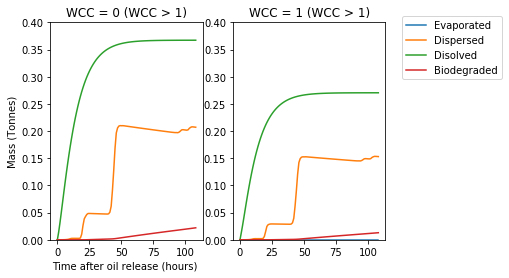

In [57]:
# Focus on the two AK cases and look at dispersed, disolved, biodegraded values (>0). 
# The difference in these runs is that the left has very negative evporation rates while the right side has evaporation set to zero when negative

plot_data = [15,18,24,37]
fig, axs = plt.subplots(1,2)

# left panel: EC-AK
axs[0].plot(data_ecAK2D[range(109), plot_data[0]])
axs[0].plot(data_ecAK2D[range(109), plot_data[1]])
axs[0].plot(data_ecAK2D[range(109), plot_data[2]])
axs[0].plot(data_ecAK2D[range(109), plot_data[3]])

# right panel: fixed evap algorithm for EC-AK
axs[1].plot(data_ecAKfix2D[range(109), plot_data[0]])
axs[1].plot(data_ecAKfix2D[range(109), plot_data[1]])
axs[1].plot(data_ecAKfix2D[range(109), plot_data[2]])
axs[1].plot(data_ecAKfix2D[range(109), plot_data[3]])

axs[0].set_ylabel('Mass (Tonnes)')
axs[0].set_xlabel('Time after oil release (hours) ')
axs[0].set_ylim([0, 0.4])
axs[1].set_ylim([0, 0.4])
axs[1].legend(['Evaporated', 'Dispersed','Disolved','Biodegraded'], loc='upper right', bbox_to_anchor= (1.8, 1.05))
axs[0].set_title('AK')
axs[1].set_title('WCC = 1 (WCC > 1)')

plt.savefig('MB_BunkerC_AK_2panel_comparison.png')

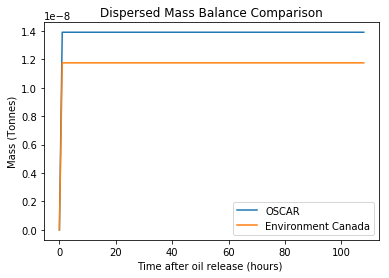

In [43]:
plot_data = [15,18,24,37]
plt.plot(data_oscar2D[range(109), plot_data[1]])
plt.plot(data_ec2D[range(109), plot_data[1]])
plt.ylabel('Mass (Tonnes)')
plt.xlabel('Time after oil release (hours) ')
plt.legend(['OSCAR', 'Environment Canada'])
plt.title('Dispersed Mass Balance Comparison')
plt.savefig('MB_OSCARvEEC_DispersionComparison.png')

## Compare 2D oil thickness


In [22]:
oscar_file = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_OSCAR/Lagrangian_BunkerC_crude_SOG_21nov17-28nov17.nc'
oscar_output = xr.open_dataset(oscar_file)

ec_nc = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17/Lagrangian_BunkerC_crude_SOG_21nov17-28nov17.nc'
ec_output = xr.open_dataset(ec_nc)

ecAK_nc = '/Users/rmueller/Projects/MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_SmallerEvapCoef/Lagrangian_BunkerC_AK_crude_SOG_21nov17-28nov17.nc'
ecAK_output = xr.open_dataset(ecAK_nc)


In [23]:
oscar_thick = oscar_output.Thickness_2D
oscar_thick_s = oscar_thick.sum(dim='time')

ec_thick = ec_output.Thickness_2D
ec_thick_s = ec_thick.sum(dim='time')

ecAK_thick = ecAK_output.Thickness_2D
ecAK_thick_s = ecAK_thick.sum(dim='time')

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc'

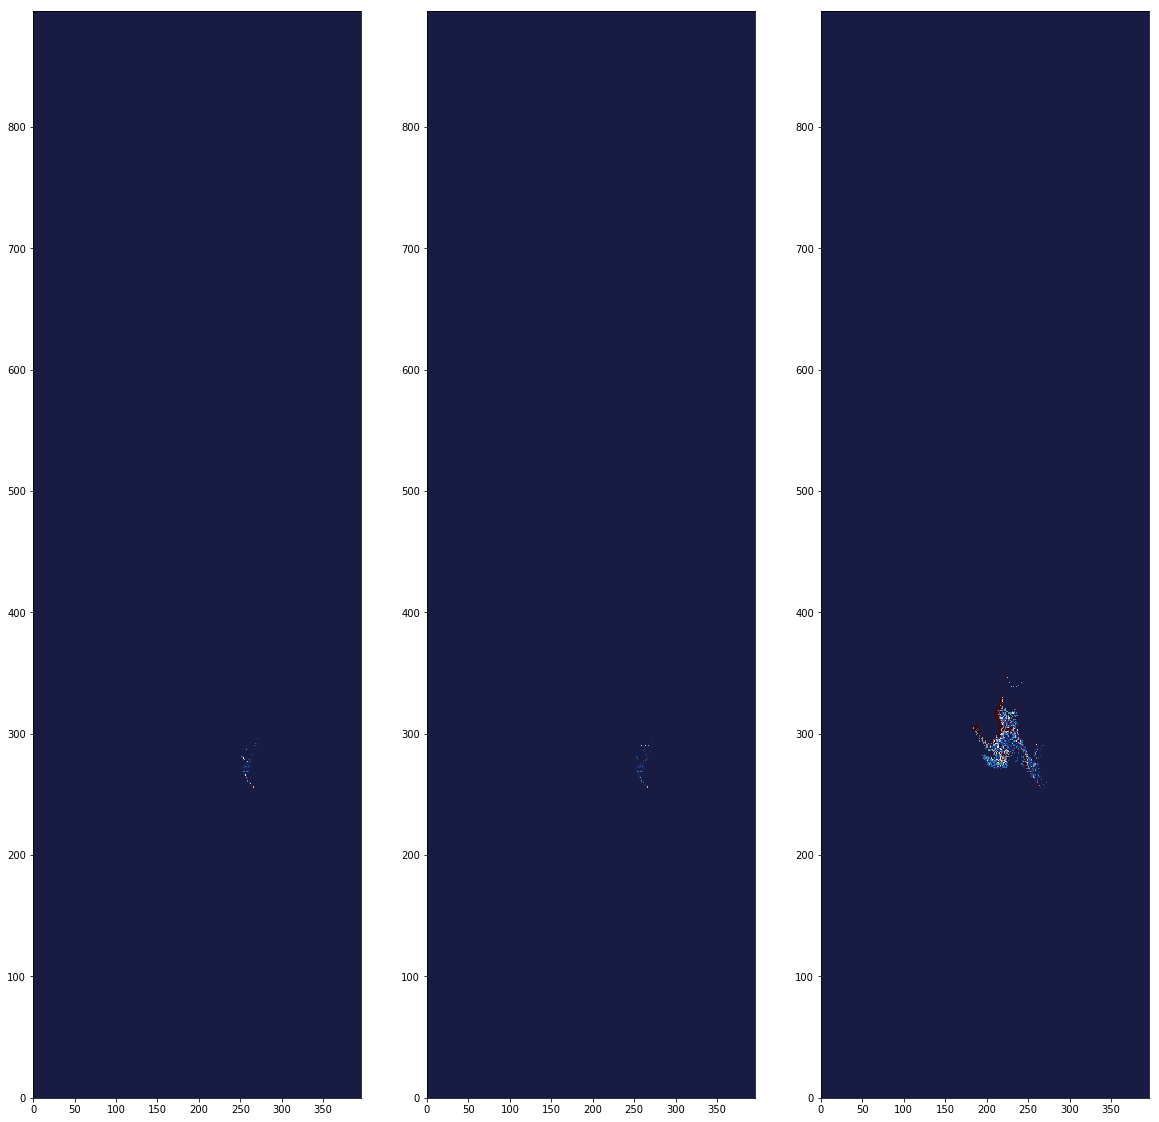

In [24]:
fs = 20
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(oscar_thick_s.values, vmin = 0, vmax = 40, cmap = cm.cm.balance)
mappable = ax2.pcolormesh(ec_thick_s.values, vmin = 0, vmax = 40, cmap = cm.cm.balance)
mappable = ax3.pcolormesh(ecAK_thick_s.values, vmin = 0, vmax = 40, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax2,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax3,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim([200,400])
ax1.set_xlim([200,300])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('OSCAR', fontsize = fs)

# remove axis labelsand add titles for diesel graphic
viz_tools.set_aspect(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim([200,400])
ax2.set_xlim([200,300])
#ax1.set_ylabel('test', fontsize = 20)
ax2.set_title('Environment Canada', fontsize = fs)

# remove axis labelsand add titles for diesel graphic
viz_tools.set_aspect(ax3)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylim([200,400])
ax3.set_xlim([200,300])
#ax1.set_ylabel('test', fontsize = 20)
ax3.set_title('Environment Canada, Anchorage', fontsize = fs)

# add
# add colorbar 
#cbar = fig.colorbar(mappable)
#cbar.set_label('thickness', fontsize = 20)
#cbar.ax.tick_params(labelsize = 20)

# remove the colorbar to have more control on sizing
#test = mappable.colorbar
#test.remove()

# adjust colorbar for Oscar graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Thickness (microns) summed over model run', fontsize=fs)
cb.ax.tick_params(labelsize = fs)
cb.remove()

# adjust colorbar for EC graphic
divider = make_axes_locatable(ax2)
c2 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c2)
cb.set_label('Thickness (microns) summed over model run', fontsize=fs)
cb.ax.tick_params(labelsize = fs)
cb.remove()

# adjust colorbar for EC graphic
divider = make_axes_locatable(ax3)
c3 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c3)
cb.set_label('Thickness (microns) summed over model run', fontsize=fs)
cb.ax.tick_params(labelsize = fs)
viz_tools.plot_coastline

plt.savefig('./OSCAR_EC_thickness_01dec2017.jpeg',format='jpeg', dpi=500,  bbox_inches='tight')

